# Cuaderno de Notas de Métodos Numéricos
## Interpolación: motivación y preliminares
### Prof. Jorge I. Zuluaga


#### Ejecutarme siempre

A continuación descargamos en el espacio virtual de este cuaderno todos los archivos necesarios para que las notas del curso funcionen bien:

In [ ]:
!git clone https://github.com/JorgeZuluaga/NotasMetodosNumericos
!ln -s NotasMetodosNumericos mn
!make -C mn pull

Cloning into 'NotasMetodosNumericos'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 108 (delta 46), reused 82 (delta 20), pack-reused 0
Receiving objects: 100% (108/108), 8.53 MiB | 19.32 MiB/s, done.
Resolving deltas: 100% (46/46), done.
make: Entering directory '/content/NotasMetodosNumericos'
git reset --hard HEAD
HEAD is now at 876de31 Commit
git pull origin master
From https://github.com/JorgeZuluaga/NotasMetodosNumericos
 * branch            master     -> FETCH_HEAD
Already up to date.
make: Leaving directory '/content/NotasMetodosNumericos'


## Un vistazo de la clase

  Qué veremos en esta clase:

  - Interpolación: motivación
  - Interpolación lineal.
  - Interpolación de Lagrange.

  Para leer en el libro: sección 3.1 "Interpolación y Polinomio de Lagrange" (hasta el Teorema 3.3 sin incluir este último).

## Recordemos

- Pero hay situaciones en las que no se dispone de una función exacta:

  - Durante la pandemia del Coronavirus se tomaron datos del número de personas $i(t)$ que resultaban contagiadas en un día específico.  Sin embargo no se sabe el valor de las personas contagiadas en cualquier instante de tiempo $t$ (a cualquier hora y en cualquier día).

  <center>
  <img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/datos-coronavirus.png" width=500>
  </center>

  - La tasa de cambio de una divisa a otra $D(t)$ puede cambiar en cada instante de tiempo, pero la verdad es que solo se publica el valor de esa tasa en momentos específicos de cada día.

  - La temperatura $T(t)$ en un lugar específico del planeta se puede medir en cada instante del tiempo, pero en realidad solo se publica su valor cada cierto intervalo de tiempo.

- ¿Cómo construir una función continua $P(x)$ que aproxime de la mejor manera posible un función desconocida $f(x)$ para la cuál solo se conocen solo valores discretos $f(x_1)$, $f(x_2)$, $f(x_3)$, etc.?

- Uno de los métodos más utilizados para aproximar una función es el **método de interpolación polinomial**.  

- En el método de interpolación polinomial se pretende encontrar un polinomio o conjunto de *polinomios algebraicos*, que son funciones de la forma:

  $$
  P_{n}(x)=a_{n} x^{n}+a_{n-1} x^{n-1}+\cdots+a_{1} x+a_{0}
  $$

  tal que se cumpla que para un conjunto de $n+1$ valores $\{x_0, x_1, x_2, \cdots, x_n\}$ en un intervalo $[a,b]$ se cumpla, como mínimo que:

  $$
  f(x_i)=P(x_i)
  $$

- En la figura abajo se ilustra el objetivo buscado:

<center>
  <img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/interpolacion-polinomial.png" width=500>
  </center>

- Al polinomio $P(x)$ (o conjunto de polinomios), se lo conoce como **polinomio interpolante**.

### Polinomio interpolante de Lagrange

- Los resultados anteriores para el caso de la interpolación lineal (2 puntos) y la interpolación de grado 2 (3 puntos) se generalizan para un número general de puntos usando el siguiente teorema:

- **Teorema de interpolación de Lagrange**. Si $x_{0}, x_{1}, \ldots, x_{n}$ son $n+1$ números distintos y $f$ es una función cuyos valores están determinados en estos números, entonces existe un único polinomio $P(x)$ de grado a lo sumo $n$ con
$$
f\left(x_{k}\right)=P\left(x_{k}\right), \quad \text { para cada } k=0,1, \ldots, n .
$$
Este polinomio está determinado por
$$
P(x)=f\left(x_{0}\right) L_{n, 0}(x)+\cdots+f\left(x_{n}\right) L_{n, n}(x)=\sum_{k=0}^{n} f\left(x_{k}\right) L_{n, k}(x)
$$
donde, para cada $k=0,1, \ldots, n$,
$$
\begin{aligned}
L_{n, k}(x) &=\frac{\left(x-x_{0}\right)\left(x-x_{1}\right) \cdots\left(x-x_{k-1}\right)\left(x-x_{k+1}\right) \cdots\left(x-x_{n}\right)}{\left(x_{k}-x_{0}\right)\left(x_{k}-x_{1}\right) \cdots\left(x_{k}-x_{k-1}\right)\left(x_{k}-x_{k+1}\right) \cdots\left(x_{k}-x_{n}\right)} \\
&=\prod_{\substack{i=0 \\
i \neq k}}^{n} \frac{\left(x-x_{i}\right)}{\left(x_{k}-x_{i}\right)}
\end{aligned}
$$

In [1]:
def interpolacion_lagrange(xs,fs):
  import sympy as sp
  x=sp.symbols("x")
  #Número de puntos
  N=len(xs)
  #Lista con las L
  Ls=[0]*N
  #Cálculo de las L
  for n in range(N):
    Ls[n]=1.0
    for k in range(N):
      if k!=n:
        Ls[n]=Ls[n]*(x-xs[k])/(xs[n]-xs[k])
  #Cálculo del polinomio
  P=0
  for i in range(N):
    P=P+Ls[i]*fs[i]
  #Simplificacion
  P=sp.simplify(P)
  #Numérico
  Pfun=sp.lambdify(x,P)

  return P,Pfun

## Trabajando con datos reales

- Vamos a trabajar ahora con datos reales.  Pero para ello es necesario, primero, obtener datos de alguna fuente confiable y sobre el fenómeno de interés que queremos estudiar.

- Vamos a trabajar en este ejemplo con datos meteorológicos.  Existen varias fuentes de interés:

  - El servicio de MeteoBlue provee datos históricos de distintas variables climáticas: https://www.meteoblue.com/es/tiempo/archive/export

  - El IDEAM de Colombia provee también datos meteorológicos pasados y futuros: http://www.pronosticosyalertas.gov.co/datos-abiertos-ideam

- Podemos descargar el histórico de temperaturas por horas para Medellín de los últimos días, directamente de la página de MeteoBlue.  Para ellos buscamos Medellín y después en Ajustes escojemos datos por horas.

- Para facilitar este ejercicio hemos descargado previamente datos, tanto de MeteoBlue como del IDEAM, que están disponibles en este sitio web de descarga directa: 

  - Datos históricos de MeteoBlue: https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/datos/dataexport_20220330T141717.csv.

  - Datos futuros de IDEAM: https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/datos/MEDELLIN.csv.

- Necesitamos descargar los datos:

In [92]:
!rm *.csv

In [93]:
!wget https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/datos/dataexport_20220330T141717.csv
!wget https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/datos/MEDELLIN.csv

--2022-03-30 16:31:25--  https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/datos/dataexport_20220330T141717.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 835 [text/plain]
Saving to: ‘dataexport_20220330T141717.csv’

dataexport_20220330 100%[===================>]     835  --.-KB/s    in 0s      

2022-03-30 16:31:26 (22.5 MB/s) - ‘dataexport_20220330T141717.csv’ saved [835/835]

--2022-03-30 16:31:26--  https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/datos/MEDELLIN.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP reque

### Trabajando con Pandas

- Para trabajar con datos en Python, se ha vuelto un estándar usar la biblioteca de algoritmos `Pandas` que permite la manipulación más inteligente de datos en muy diversos formatos.

- Para usar pandas primero debemos importar el paquete:

In [94]:
import pandas as pd

- Una vez tenemos el paquete la función más importante de pandas es aquella que nos permite cargar los datos en memoria. Para ello existen algoritmos como:

  - `pd.read_excel`: Lee un archivo en formato excel.
  - `pd.read_csv`: Lee un archivo en formato de datos separados por comas (*comma separated values*).
  - `pd.read_json`: Lee un archivo en formato de `JSON`, muy común en aplicaciones web.

- En nuestro caso los datos están en formato `csv`.  Antes de leer los datos es bueno revisar primero las primeras líneas para conocer como están organizados los datos:

In [95]:
!head -n 20 dataexport_20220330T141717.csv

location,Medellín
lat,6.25154
lon,-75.54994
asl,2043.341
variable,Temperature
unit,°C
level,2 m elevation corrected
resolution,hourly
aggregation,None
timestamp,Medellín Temperature [2 m elevation corrected]
20220316T0600,15.739214
20220316T0700,17.029213
20220316T0800,18.629213
20220316T0900,20.209213
20220316T1000,21.849215
20220316T1100,24.039213
20220316T1200,23.589214
20220316T1300,23.709213
20220316T1400,23.189215
20220316T1500,22.499214


- Como vemos los datos no comienzan sino desde la fila 10.  Para leer los datos usamos entonces:

In [96]:
datos=pd.read_csv("dataexport_20220330T141717.csv",skiprows=9)
datos

,timestamp,Medellín Temperature [2 m elevation corrected]
0,20220316T0600,15.739214
1,20220316T0700,17.029213
2,20220316T0800,18.629213
3,20220316T0900,20.209213
4,20220316T1000,21.849215
5,20220316T1100,24.039213
6,20220316T1200,23.589214
7,20220316T1300,23.709213
8,20220316T1400,23.189215
9,20220316T1500,22.499214


- Lo primero que podemos hacer es ver un gráfico sencillo de los datos:

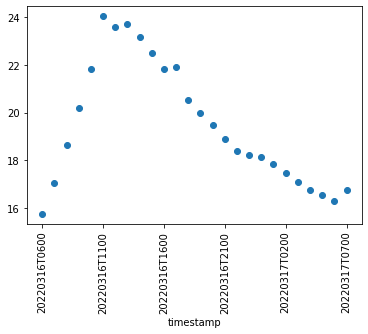

In [97]:
import matplotlib.pyplot as plt
datos.plot("timestamp","Medellín Temperature [2 m elevation corrected]",
           marker='o',linewidth=0,legend=False)
plt.xticks(rotation=90);

- Con pandas los datos son cargados en un objeto que se conoce como un `DataFrame` que funciona como una lista compleja.

- Para extraer los datos de esta lista se usa el siguiente código:

In [105]:
import numpy as np
#Extraer los tiempos
ts=np.array(pd.to_datetime(datos["timestamp"]).view("int"))
ts=(ts-ts[0])/(3600*1e9)
#Extraer las temperaturas
Ts=np.array(datos["Medellín Temperature [2 m elevation corrected]"])

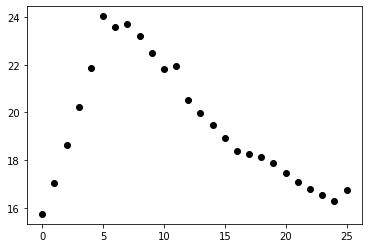

In [106]:
plt.plot(ts,Ts,'ko')

- Ahora podemos intentar hacer la interpolación:

In [108]:
P,Pfun=interpolacion_lagrange(ts,Ts)

- Con la función interpolante podemos ahora hacer un gráfico de los datos y el polinomio interpolante:

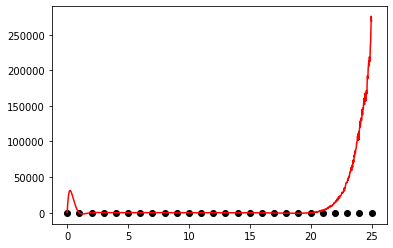

In [107]:
tns=np.linspace(ts[0],ts[-1],1000)
Tns=Pfun(tns)

plt.plot(ts,Ts,'ko')
plt.plot(tns,Tns,'r-')

## Error en la interpolación de Lagrange

- Como siempre, sin embargo, no podemos contentarnos con deducir un método, sin además definir cuáles son los errores de ese método.  

- En este caso, queremos saber qué tan diferente es el valor de $P(x)$ respecto al valor de la función $f(x)$ que queremos aproximar, es decir $E_a=|P(x)-f(x)|$

- El error absoluto de los polinomios interpolantes de Lagrange esta dado por el siguiente teorema:

- **Teorema de error de la interpolación de Lagrange**: Suponga $x_{0}, x_{1}, \ldots, x_{n}$ son números distintos en el intervalo $[a, b]$ y $f \in C^{n+1}[a, b]$. Entonces, para cada $x$ en $[a, b]$, existe un número $\xi(x)$ (generalmente no conocido) en $(a, b)$, con
$$
f(x)=P(x)+\frac{f^{(n+1)}(\xi(x))}{(n+1) !}\left(x-x_{0}\right)\left(x-x_{1}\right) \cdots\left(x-x_{n}\right)
$$
donde $P(x)$ es el polinomio interpolante de Lagrange.

- En otras palabras, el error abroluto del polinomio interpolante de Lagrange es:

  $$
  E_a = \left|\frac{f^{(n+1)}(\xi(x))}{(n+1) !}\left(x-x_{0}\right)\left(x-x_{1}\right) \cdots\left(x-x_{n}\right)\right|
  $$

- Como normalmente el valor de $\xi(x)$ no se conoce, en situaciones normales es posible encontrar solamente una cota superior para el error dada por:

 $$
 E_a < \left|\frac{M}{(n+1) !}\left(x-x_{0}\right)\left(x-x_{1}\right) \cdots\left(x-x_{n}\right)\right|
 $$
 donde $M$ es el valor máximo que puede tener $f^{(n+1)}(x)$ en el intervalo $[a,b]$.

### Ejemplo de error en la interpolación de Lagrange

- **Ejemplo 3 (Página 85)**. Encuentre el polinomio de grado 2 que aproxima la función $f(x)=1/x$ en $[2,4]$ usando los nodos $x_{0}=2, x_{1}=2.75$ y $x_{2}=4$ y determine la forma del error para este polinomio y el error máximo cuando el polinomio se usa para aproximar $f(x)$ para $x \in[2,4]$.

  - **Solución**:

    - Necesitamos los valores de la función: $f\left(x_{0}\right)=f(2)=1 / 2, f\left(x_{1}\right)=f(2.75)=4 / 11, \text { y } f\left(x_{2}\right)=f(4)=1 / 4$

    - El polinomio será:

      $$
      P_3(x)=\frac{1}{3}(x-2.75)(x-4)-\frac{64}{165}(x-2)(x-4)+\frac{1}{10}(x-2)(x-2.75)
      $$

    - Como $f(x)=x^{-1}$, tenemos
     $$
f^{\prime}(x)=-x^{-2}, \quad f^{\prime \prime}(x)=2 x^{-3}, \quad \mathrm{y} \quad f^{\prime \prime \prime}(x)=-6 x^{-4}
$$

    - En consecuencia, el segundo polinomio de Lagrange tiene el error de la forma
     $$
\frac{f^{\prime \prime \prime}(\xi(x))}{3 !}\left(x-x_{0}\right)\left(x-x_{1}\right)\left(x-x_{2}\right)=-(\xi(x))^{-4}(x-2)(x-2.75)(x-4), \text { para } \xi(x) \text { en }(2,4)
$$

    - El valor máximo de $(\xi(x))^{-4}$ en el intervalo es $2^{-4}=1 / 16$. 
    
    - Por lo tanto, el error máximo del error absoluto será:
     
     $$
E_a < \frac{f^{\prime \prime \prime}(\xi(x))}{3 !}\left|\left(x-x_{0}\right)\left(x-x_{1}\right)\left(x-x_{2}\right)\right| \leq \frac{1}{16} |\left(x-x_{0}\right)\left(x-x_{1}\right)\left(x-x_{2}\right)|.
$$
      que depende del valor de $x$ que escojamos.
    
    - Si queremos encontrar el valor máximo del error para cualquier valor de $x$ el procedimiento que devemos seguir es el siguiente.
    
    - Necesitamos determinar el valor máximo en este intervalo del valor absoluto del polinomio
     $$
g(x)=(x-2)(x-2.75)(x-4)=x^{3}-\frac{35}{4} x^{2}+\frac{49}{2} x-22 .
$$
     Como

     $$
D_{x}\left(x^{3}-\frac{35}{4} x^{2}+\frac{49}{2} x-22\right)=3 x^{2}-\frac{35}{2} x+\frac{49}{2}=\frac{1}{2}(3 x-7)(2 x-7)
$$

     los puntos críticos se presentan en
     $$
x=\frac{7}{3}, \operatorname{con} g\left(\frac{7}{3}\right)=\frac{25}{108}, \quad y \quad x=\frac{7}{2}, \operatorname{con} g\left(\frac{7}{2}\right)=-\frac{9}{16}
$$

    - Por lo tanto, el error máximo es
     $$
\frac{f^{\prime \prime \prime}(\xi(x))}{3 !}\left|\left(x-x_{0}\right)\left(x-x_{1}\right)\left(x-x_{2}\right)\right| \leq \frac{1}{16}\left|-\frac{9}{16}\right|=\frac{9}{256} \approx 0.03515625 .
$$


## Continuará...

## Ejercicios

- Resolver los ejercicios de la sección 3.1:

  - Ejercicio 1, literal b.
  - Ejercicio 2, literal d. 
  - Ejercicio 5, literal d.


-----
*Fin*